<a href="https://colab.research.google.com/github/Akshatasthana18/Akshat/blob/main/placement98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Placement dataset**

In [1]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
data=pd.read_csv("/content/datasets_596958_1073629_Placement_Data_Full_Class (1).csv")

In [6]:
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [8]:
data.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [9]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [10]:
data.dtypes

,0
sl_no,int64
gender,object
ssc_p,float64
ssc_b,object
hsc_p,float64
hsc_b,object
hsc_s,object
degree_p,float64
degree_t,object
workex,object


In [11]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# **Removing missing values**

**1. imputation**



Central trendencies:-
mean
median
mode

<ipython-input-13-1393479259>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.salary)


<Axes: xlabel='salary', ylabel='Density'>

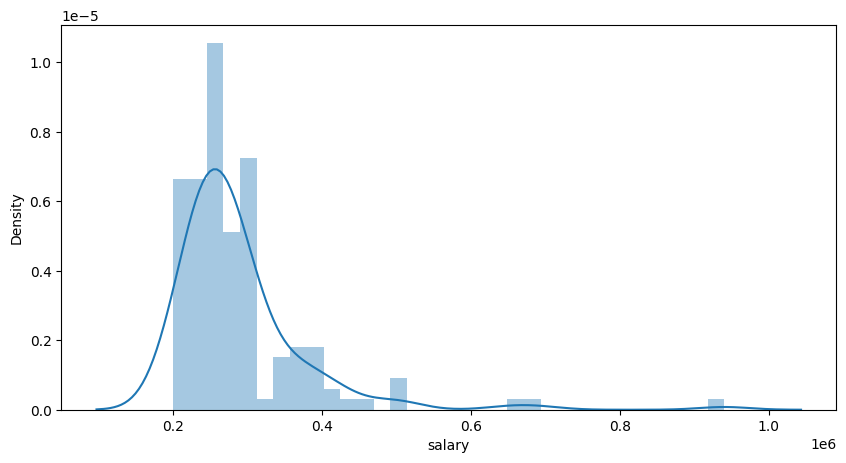

In [13]:
fig=plt.figure(figsize=(10,5))
sns.distplot(data.salary)

Replace by median value

In [14]:
data["salary"].fillna(data["salary"].median(),inplace=True)

<ipython-input-14-855790755>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["salary"].fillna(data["salary"].median(),inplace=True)


In [15]:
data.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


replacing with mean value

In [16]:
#data["salary"].fillna(data["salary"].mean(),inplace=True)
##data["salary"].fillna(data["salary"].mode(),inplace=True)

**2. dropping **

In [17]:
data1=pd.read_csv("/content/datasets_596958_1073629_Placement_Data_Full_Class (1).csv")

In [18]:
data1.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [19]:
data2=data1.dropna(how='any')

In [20]:
data=data.drop(['gender'],axis=1)

In [21]:
data.isnull().sum()

,0
sl_no,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


# **Data Cleaning**

In [22]:
data[['ssc_b']].value_counts()

,count
ssc_b,
Central,116
Others,99


In [23]:
data.replace({'ssc_b':{'Central':0,'Others':1}},inplace=True)

<ipython-input-23-1205085468>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'ssc_b':{'Central':0,'Others':1}},inplace=True)


In [24]:
data[['ssc_b']].value_counts()

,count
ssc_b,
0,116
1,99


In [25]:
data[['hsc_b']].value_counts()

,count
hsc_b,
Others,131
Central,84


In [26]:
data.replace({'hsc_b':{'Central':0,'Others':1}},inplace=True)

<ipython-input-26-2678647643>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'hsc_b':{'Central':0,'Others':1}},inplace=True)


In [27]:
data[['hsc_b']].value_counts()

,count
hsc_b,
1,131
0,84


In [28]:
data[['hsc_s']].value_counts()

,count
hsc_s,
Commerce,113
Science,91
Arts,11


In [29]:
data.replace({'hsc_s':{'Commerce':0,'Science':1,'Arts':2}},inplace=True)

<ipython-input-29-3696021128>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'hsc_s':{'Commerce':0,'Science':1,'Arts':2}},inplace=True)


In [30]:
data[['hsc_s']].value_counts()

,count
hsc_s,
0,113
1,91
2,11


In [31]:
data[['degree_t']].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [32]:
data.replace({'degree_t':{'Comm&Mgmt':0,'Sci&Tech':1,'Others':2}},inplace=True)

<ipython-input-32-3923621745>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'degree_t':{'Comm&Mgmt':0,'Sci&Tech':1,'Others':2}},inplace=True)


In [33]:
data[['degree_t']].value_counts()

,count
degree_t,
0,145
1,59
2,11


In [34]:
data[['workex']].value_counts()

,count
workex,
No,141
Yes,74


In [35]:
data.replace({'workex':{'No':0,'Yes':1}},inplace=True)

<ipython-input-35-3678623939>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'workex':{'No':0,'Yes':1}},inplace=True)


In [36]:
data[['workex']].value_counts()

,count
workex,
0,141
1,74


In [37]:
data[['specialisation']].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [38]:
data.replace({'specialisation':{'Mkt&Fin':0,'Mkt&HR':1}},inplace=True)

<ipython-input-38-1541008283>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'specialisation':{'Mkt&Fin':0,'Mkt&HR':1}},inplace=True)


In [39]:
data[['specialisation']].value_counts()

,count
specialisation,
0,120
1,95


In [40]:
data[['status']].value_counts()

,count
status,
Placed,148
Not Placed,67


In [41]:
data.replace({'status':{'Placed':0,'Not Placed':1}},inplace=True)

<ipython-input-41-3479340893>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'status':{'Placed':0,'Not Placed':1}},inplace=True)


In [42]:
data[['status']].value_counts()

,count
status,
0,148
1,67


#**data visualisation**

In [43]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
dataset = data

In [45]:
dataset.head()

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,0,58.00,1,0,55.0,1,58.80,0,270000.0
1,2,79.33,0,78.33,1,1,77.48,1,1,86.5,0,66.28,0,200000.0
2,3,65.00,0,68.00,0,2,64.00,0,0,75.0,0,57.80,0,250000.0
3,4,56.00,0,52.00,0,1,52.00,1,0,66.0,1,59.43,1,265000.0
4,5,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50,0,425000.0


In [46]:
dataset.shape

(215, 14)

In [47]:
x=dataset
y=dataset.salary

In [48]:
print(x)

     sl_no  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0        1  67.00      1  91.00      1      0     58.00         1       0   
1        2  79.33      0  78.33      1      1     77.48         1       1   
2        3  65.00      0  68.00      0      2     64.00         0       0   
3        4  56.00      0  52.00      0      1     52.00         1       0   
4        5  85.80      0  73.60      0      0     73.30         0       0   
..     ...    ...    ...    ...    ...    ...       ...       ...     ...   
210    211  80.60      1  82.00      1      0     77.60         0       0   
211    212  58.00      1  60.00      1      1     72.00         1       0   
212    213  67.00      1  67.00      1      0     73.00         0       1   
213    214  74.00      1  66.00      1      0     58.00         0       0   
214    215  62.00      0  58.00      1      1     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       55.0       

In [49]:
print(y)

0      270000.0
1      200000.0
2      250000.0
3      265000.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214    265000.0
Name: salary, Length: 215, dtype: float64


** **split the data in test and train.**

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
xtrain.head()

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
2,3,65.00,0,68.00,0,2,64.00,0,0,75.00,0,57.80,0,250000.0
169,170,59.96,1,42.16,1,1,61.26,1,0,54.48,1,65.48,1,265000.0
3,4,56.00,0,52.00,0,1,52.00,1,0,66.00,1,59.43,1,265000.0
118,119,76.00,0,80.00,0,1,78.00,1,1,97.00,1,70.48,0,276000.0
14,15,62.00,0,47.00,0,0,50.00,0,0,76.00,1,54.96,1,265000.0


In [52]:
ytest.head()

,salary
23,300000.0
166,240000.0
163,500000.0
13,218000.0
64,240000.0


In [53]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((172, 14), (43, 14), (172,), (43,))

In [54]:
sc=StandardScaler()

In [55]:
x_std=dataset[['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']]

In [56]:
x_std=sc.fit_transform(x_std)

In [57]:
x_std

array([[-1.72401341, -0.02808697,  1.08245885, ...,  1.12390297,
        -0.59764672, -0.67283185],
       [-1.70790113,  1.11336869, -0.92382264, ..., -0.88975652,
         0.6876202 , -0.67283185],
       [-1.69178886, -0.21323793, -0.92382264, ..., -0.88975652,
        -0.76947385, -0.67283185],
       ...,
       [ 1.69178886, -0.02808697,  1.08245885, ..., -0.88975652,
         1.27870553, -0.67283185],
       [ 1.70790113,  0.61994138,  1.08245885, ...,  1.12390297,
        -0.35193393, -0.67283185],
       [ 1.72401341, -0.49096436, -0.92382264, ...,  1.12390297,
        -0.3536522 ,  1.48625544]])

In [58]:
x[['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']]=pd.DataFrame(x_std,columns=[['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']])

In [59]:
x

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,-1.724013,-0.028087,1.082459,2.268812,0.800763,-0.886281,-1.140102,1.073409,-0.724446,-1.291091,1.123903,-0.597647,-0.672832,270000.0
1,-1.707901,1.113369,-0.923823,1.103448,0.800763,0.800006,1.513267,1.073409,1.380364,1.087157,-0.889757,0.687620,-0.672832,200000.0
2,-1.691789,-0.213238,-0.923823,0.153313,-1.248809,2.486294,-0.322843,-0.648852,-0.724446,0.218908,-0.889757,-0.769474,-0.672832,250000.0
3,-1.675677,-1.046417,-0.923823,-1.318339,-1.248809,0.800006,-1.957362,1.073409,-0.724446,-0.460592,1.123903,-0.489396,1.486255,265000.0
4,-1.659564,1.712332,-0.923823,0.668391,-1.248809,-0.886281,0.943909,-0.648852,-0.724446,1.864806,-0.889757,-1.164676,-0.672832,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.659564,1.230940,1.082459,1.441008,0.800763,-0.886281,1.529612,-0.648852,-0.724446,1.426906,-0.889757,2.098321,-0.672832,400000.0
211,1.675677,-0.861266,1.082459,-0.582513,0.800763,0.800006,0.766836,1.073409,-0.724446,0.143408,-0.889757,-1.487711,-0.672832,275000.0
212,1.691789,-0.028087,1.082459,0.061335,0.800763,-0.886281,0.903046,-0.648852,1.380364,-0.989091,-0.889757,1.278706,-0.672832,295000.0
213,1.707901,0.619941,1.082459,-0.030644,0.800763,-0.886281,-1.140102,-0.648852,-0.724446,-0.158592,1.123903,-0.351934,-0.672832,204000.0


TRAIN MODEL

In [60]:
rr=RandomForestRegressor(random_state=25)

In [61]:
rr.fit(xtrain,ytrain)
y_pred=rr.predict(xtest)
r2 = r2_score(ytest, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.98


In [62]:
y_pred

array([301200., 239160., 466590., 215800., 239780., 474050., 259480.,
       265430., 265000., 250020., 260070., 210940., 250050., 265000.,
       219150., 300520., 240000., 299400., 265000., 265400., 239610.,
       202720., 271450., 200960., 299850., 292980., 265300., 219190.,
       414330., 365250., 251640., 275600., 275760., 299970., 265000.,
       353260., 265000., 265000., 259430., 265000., 264930., 265000.,
       265000.])

# ***Model Evaluation***

In [63]:
mean_squared_error(ytest,y_pred)

73564760.46511628

In [64]:
mean_absolute_error(ytest,y_pred)

3043.4883720930234

In [65]:
r2_score(ytest,y_pred)

0.9825348545881347

# ***GET VISUALIZATION OF ACTUAL VS PREDICTED RESULT***

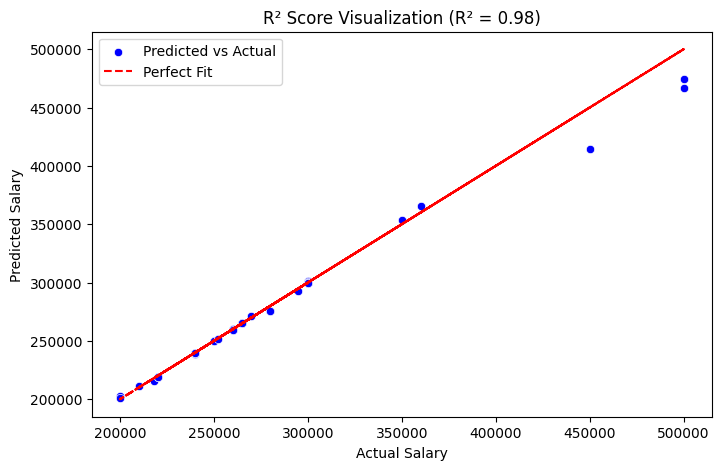

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=ytest, y=y_pred, color='blue', label="Predicted vs Actual")
plt.plot(ytest, ytest, color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"R² Score Visualization (R² = {r2:.2f})")
plt.legend()
plt.show()

In [67]:
corr_matrix = dataset.corr()

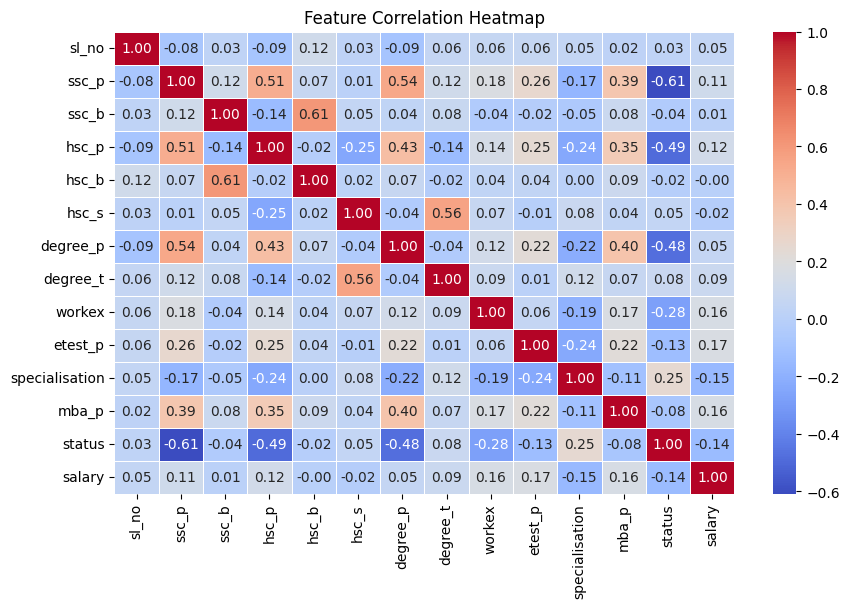

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()